In [31]:
import mediapipe as mp
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt

In [85]:
mp_holistic = mp.solutions.holistic
# Import drawing_utils and drawing_styles.
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

In [23]:
im = 'download.png'
images = {im: cv2.imread(im)}

In [34]:
DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
    h, w = image.shape[:2]
    if h < w:
        img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
    else:
        img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
    
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()

SolutionOutputs(pose_landmarks, pose_world_landmarks, left_hand_landmarks, right_hand_landmarks, face_landmarks, segmentation_mask)
Nose coordinates: (137.72252082824707, 189.68046337366104)
Pose landmarks of download.png:


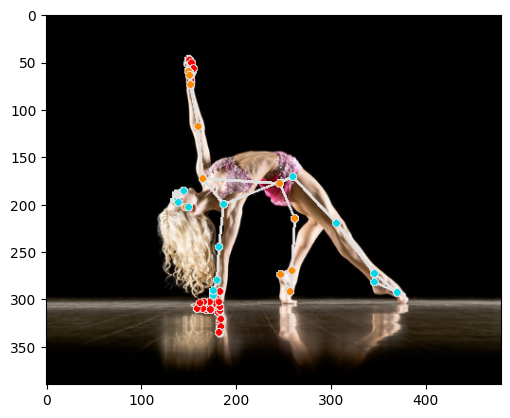

In [72]:
# Run MediaPipe Holistic and draw pose landmarks.
with mp_holistic.Holistic(
    static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as holistic:
    for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Pose.
        results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        # Print nose coordinates.
        image_hight, image_width, _ = image.shape
        if results.pose_landmarks:
            print(
                f'Nose coordinates: ('
                f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].x * image_width}, '
                f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].y * image_hight})'
            )

        # Draw pose landmarks.
        print(f'Pose landmarks of {name}:')
        annotated_image = image.copy()
        mp_drawing.draw_landmarks(annotated_image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
        mp_drawing.draw_landmarks(annotated_image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
        mp_drawing.draw_landmarks(
            annotated_image,
            results.face_landmarks,
            mp_holistic.FACEMESH_TESSELATION,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_tesselation_style())
        mp_drawing.draw_landmarks(
            annotated_image,
            results.pose_landmarks,
            mp_holistic.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.
            get_default_pose_landmarks_style())
        resize_and_show(annotated_image)

In [74]:
results.__doc__

'SolutionOutputs(pose_landmarks, pose_world_landmarks, left_hand_landmarks, right_hand_landmarks, face_landmarks, segmentation_mask)'

In [67]:
mp_holistic.PoseLandmark._member_names_

['NOSE',
 'LEFT_EYE_INNER',
 'LEFT_EYE',
 'LEFT_EYE_OUTER',
 'RIGHT_EYE_INNER',
 'RIGHT_EYE',
 'RIGHT_EYE_OUTER',
 'LEFT_EAR',
 'RIGHT_EAR',
 'MOUTH_LEFT',
 'MOUTH_RIGHT',
 'LEFT_SHOULDER',
 'RIGHT_SHOULDER',
 'LEFT_ELBOW',
 'RIGHT_ELBOW',
 'LEFT_WRIST',
 'RIGHT_WRIST',
 'LEFT_PINKY',
 'RIGHT_PINKY',
 'LEFT_INDEX',
 'RIGHT_INDEX',
 'LEFT_THUMB',
 'RIGHT_THUMB',
 'LEFT_HIP',
 'RIGHT_HIP',
 'LEFT_KNEE',
 'RIGHT_KNEE',
 'LEFT_ANKLE',
 'RIGHT_ANKLE',
 'LEFT_HEEL',
 'RIGHT_HEEL',
 'LEFT_FOOT_INDEX',
 'RIGHT_FOOT_INDEX']

In [69]:
#mp_holistic.PoseLandmark.
results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE]

x: 0.2869219183921814
y: 0.4863601624965668
z: -0.4738936424255371
visibility: 0.9999977350234985

In [77]:
mp_holistic.FACEMESH_CONTOURS

frozenset({(0, 267),
           (7, 163),
           (10, 338),
           (13, 312),
           (14, 317),
           (17, 314),
           (21, 54),
           (33, 7),
           (33, 246),
           (37, 0),
           (39, 37),
           (40, 39),
           (46, 53),
           (52, 65),
           (53, 52),
           (54, 103),
           (58, 132),
           (61, 146),
           (61, 185),
           (63, 105),
           (65, 55),
           (66, 107),
           (67, 109),
           (70, 63),
           (78, 95),
           (78, 191),
           (80, 81),
           (81, 82),
           (82, 13),
           (84, 17),
           (87, 14),
           (88, 178),
           (91, 181),
           (93, 234),
           (95, 88),
           (103, 67),
           (105, 66),
           (109, 10),
           (127, 162),
           (132, 93),
           (136, 172),
           (144, 145),
           (145, 153),
           (146, 91),
           (148, 176),
           (149, 150),
   

In [78]:
mp_holistic.FACEMESH_TESSELATION

frozenset({(18, 17),
           (82, 38),
           (8, 9),
           (456, 248),
           (167, 2),
           (303, 271),
           (69, 104),
           (253, 450),
           (41, 42),
           (315, 16),
           (73, 74),
           (339, 373),
           (258, 385),
           (105, 63),
           (219, 48),
           (304, 272),
           (236, 217),
           (231, 22),
           (85, 84),
           (365, 367),
           (237, 218),
           (243, 112),
           (436, 427),
           (409, 410),
           (248, 456),
           (330, 266),
           (136, 135),
           (88, 95),
           (394, 430),
           (107, 108),
           (118, 117),
           (439, 438),
           (442, 443),
           (260, 466),
           (115, 48),
           (342, 276),
           (121, 128),
           (200, 421),
           (113, 124),
           (132, 137),
           (23, 230),
           (343, 357),
           (443, 444),
           (62, 78),
           (26,

In [79]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [80]:
mp_holistic.HAND_CONNECTIONS

frozenset({(0, 1),
           (0, 5),
           (0, 17),
           (1, 2),
           (2, 3),
           (3, 4),
           (5, 6),
           (5, 9),
           (6, 7),
           (7, 8),
           (9, 10),
           (9, 13),
           (10, 11),
           (11, 12),
           (13, 14),
           (13, 17),
           (14, 15),
           (15, 16),
           (17, 18),
           (18, 19),
           (19, 20)})

In [81]:
len(results.pose_landmarks.landmark), results.pose_landmarks.landmark

(33,
 [x: 0.2869219183921814
 y: 0.4863601624965668
 z: -0.4738936424255371
 visibility: 0.9999977350234985
 , x: 0.2824021875858307
 y: 0.5050035119056702
 z: -0.4572490155696869
 visibility: 0.9999955892562866
 , x: 0.28315725922584534
 y: 0.5068152546882629
 z: -0.45764094591140747
 visibility: 0.999996542930603
 , x: 0.284011572599411
 y: 0.5088881254196167
 z: -0.4576281011104584
 visibility: 0.999996542930603
 , x: 0.2855161428451538
 y: 0.5041892528533936
 z: -0.49064433574676514
 visibility: 0.9999972581863403
 , x: 0.2883371114730835
 y: 0.5057882070541382
 z: -0.49102964997291565
 visibility: 0.9999979734420776
 , x: 0.2915872633457184
 y: 0.5082247257232666
 z: -0.49126380681991577
 visibility: 0.9999967813491821
 , x: 0.3063740134239197
 y: 0.5223243832588196
 z: -0.3395373523235321
 visibility: 0.9999991655349731
 , x: 0.3136466145515442
 y: 0.5227811932563782
 z: -0.49448344111442566
 visibility: 0.9999971389770508
 , x: 0.3007998466491699
 y: 0.47887641191482544
 z: -0.4

In [82]:
len(results.pose_world_landmarks.landmark), results.pose_world_landmarks.landmark

(33,
 [x: -0.5925160646438599
 y: 0.04579298198223114
 z: -0.465968519449234
 visibility: 0.9999977350234985
 , x: -0.5830923914909363
 y: 0.06742825359106064
 z: -0.45878830552101135
 visibility: 0.9999955892562866
 , x: -0.5819658637046814
 y: 0.06962685286998749
 z: -0.4516264796257019
 visibility: 0.999996542930603
 , x: -0.5836617946624756
 y: 0.07113449275493622
 z: -0.4523477554321289
 visibility: 0.999996542930603
 , x: -0.5898749232292175
 y: 0.07457135617733002
 z: -0.4990229606628418
 visibility: 0.9999972581863403
 , x: -0.5894595384597778
 y: 0.07259592413902283
 z: -0.5113604068756104
 visibility: 0.9999979734420776
 , x: -0.5777872800827026
 y: 0.06733287125825882
 z: -0.48817360401153564
 visibility: 0.9999967813491821
 , x: -0.516411542892456
 y: 0.0757490023970604
 z: -0.35617774724960327
 visibility: 0.9999991655349731
 , x: -0.45588937401771545
 y: 0.11498226225376129
 z: -0.4669018089771271
 visibility: 0.9999971389770508
 , x: -0.571544885635376
 y: 0.023676179349

In [83]:
len(results.left_hand_landmarks.landmark), results.left_hand_landmarks.landmark

(21,
 [x: 0.3181738257408142
 y: 0.1878277063369751
 z: 4.289785948685676e-08
 , x: 0.317665159702301
 y: 0.1790652573108673
 z: -0.005460795480757952
 , x: 0.31819701194763184
 y: 0.1655176281929016
 z: -0.006886579561978579
 , x: 0.3213033080101013
 y: 0.1549699604511261
 z: -0.007352977059781551
 , x: 0.32303816080093384
 y: 0.14764896035194397
 z: -0.00722925178706646
 , x: 0.3125680088996887
 y: 0.15167030692100525
 z: -0.002750648185610771
 , x: 0.3122135102748871
 y: 0.13546518981456757
 z: -0.003621081355959177
 , x: 0.3130296766757965
 y: 0.12823398411273956
 z: -0.004816868808120489
 , x: 0.3138684928417206
 y: 0.12295233458280563
 z: -0.005680595058947802
 , x: 0.3147140443325043
 y: 0.15205718576908112
 z: -0.0008279578178189695
 , x: 0.31393125653266907
 y: 0.13696886599063873
 z: -0.0009685513796284795
 , x: 0.31509143114089966
 y: 0.12917616963386536
 z: -0.0023822898510843515
 , x: 0.31657183170318604
 y: 0.12421488761901855
 z: -0.0036199972964823246
 , x: 0.3175922036

In [84]:
len(results.right_hand_landmarks.landmark), results.right_hand_landmarks.landmark

(21,
 [x: 0.3830253481864929
 y: 0.7504790425300598
 z: 1.9529979056187585e-07
 , x: 0.37481826543807983
 y: 0.7689136862754822
 z: -0.0030703856609761715
 , x: 0.3681690990924835
 y: 0.7844331860542297
 z: -0.008976571261882782
 , x: 0.3592693507671356
 y: 0.7932012677192688
 z: -0.015401430428028107
 , x: 0.3525593876838684
 y: 0.7981765270233154
 z: -0.021651525050401688
 , x: 0.3782200515270233
 y: 0.8051292300224304
 z: -0.014894296415150166
 , x: 0.3812915086746216
 y: 0.8314581513404846
 z: -0.023723922669887543
 , x: 0.38267409801483154
 y: 0.8482670783996582
 z: -0.029021821916103363
 , x: 0.381710410118103
 y: 0.8631623983383179
 z: -0.032495271414518356
 , x: 0.38220593333244324
 y: 0.8008434176445007
 z: -0.019164513796567917
 , x: 0.384237676858902
 y: 0.8246443271636963
 z: -0.03202369436621666
 , x: 0.38400766253471375
 y: 0.8447117209434509
 z: -0.03904203698039055
 , x: 0.38050100207328796
 y: 0.8608941435813904
 z: -0.042699042707681656
 , x: 0.3823050260543823
 y: 0.